In [1]:
from pycas import *

In [2]:
from pycas.codeprinter import CCodePrinter,FunctionDefinition,c_complex

In [3]:
f = Function('f',argc = 1)
g = Function('g',argc = 2)

x,y = symbols("x, y",type=Types.Real)
z = Symbol('z',type=Types.Complex)

In [4]:
import numpy as np

def my_function_python(x,y):
    return np.cos(x)*np.sin(y)

my_function_ccode = '''double my_function(double x,double y){
    return cos(x)*sin(y);
}
'''

pycas_custom_function = custom_function("my_function",
                                argc = 2,
                                python_function=my_function_python,
                                ccode = my_function_ccode,
                                return_type=Types.Real)

In [5]:
expr = Piecewise((sqrt(x**2+y**2),(x**2+y**2<1)),(sin(x)*cos(y),(x>0)^Not(y>0)),(pycas_custom_function(x,y),True))
expr

Piecewise(tuple(sqrt(x**2+y**2),x**2+y**2<1),tuple(cos(y)*sin(x),x>0 XOR ~(y>0)),tuple(CustomFunction(my_function,x,y),True))

In [6]:
fs_def = FunctionDefinition('f_single',(x,y),expr,return_type=Types.Real,use_parallel=False)
fp_def = FunctionDefinition('f_parallel',(x,y),expr,return_type=Types.Real)

In [7]:
lib = ccompile(fp_def,fs_def)

In [8]:
import numpy as np
npx,npy = np.meshgrid(np.linspace(-3, 3, 4000),np.linspace(-3, 3, 4000))

<matplotlib.colorbar.Colorbar instance at 0x7f07d081a5a8>

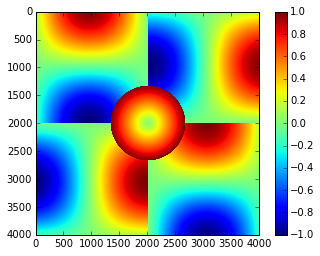

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(lib.f_parallel(npx,npy))
plt.colorbar()

In [10]:
cf_parallel = numpyfy(expr, parallel = True)
cf_single = numpyfy(expr)

In [11]:
reference = lib.f_parallel(npx,npy)
assert np.all(lib.f_single(npx,npy) == reference)
assert np.all(cf_single(x=npx,y=npy) == reference)
assert np.all(cf_parallel(x=npx,y=npy) == reference)

In [12]:
%timeit cf_single(x=npx,y=npy)

1 loops, best of 3: 1.72 s per loop


In [13]:
%timeit cf_parallel(x=npx,y=npy)

1 loops, best of 3: 414 ms per loop


In [14]:
%timeit lib.f_single(npx,npy)

1 loops, best of 3: 782 ms per loop


In [15]:
%timeit lib.f_parallel(npx,npy)

10 loops, best of 3: 139 ms per loop
